In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
X = iris.data
y = iris.target

pd.DataFrame(X, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=3).fit_transform(X)
# 누적 분산 비율 지정 PCA(n_components=0.95)
pd.DataFrame(X_reduced, columns=["1_?", "2_?", "3_?"])

,1_?,2_?,3_?
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [3]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)
X4D = pca.inverse_transform(X_reduced)
pd.DataFrame(X4D, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.099286,3.500723,1.401086,0.198295
1,4.868758,3.031661,1.447517,0.125368
2,4.693700,3.206384,1.309582,0.184951
3,4.623843,3.075837,1.463736,0.256958
4,5.019326,3.580414,1.370606,0.246168
...,...,...,...,...
145,6.565541,3.136265,5.404505,1.978794
146,6.219750,2.581327,5.122055,1.708294
147,6.456778,3.043802,5.265739,1.896748
148,6.185931,3.414258,5.421399,2.266390


In [4]:
print("주성분 : \n", pca.components_)

print('표현 분산 : \n', pca.explained_variance_ratio_)

주성분 : 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]
표현 분산 : 
 [0.92461872 0.05306648 0.01710261]


<ipython-input-5-42fe5c567f0a>:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(df_v['V_ration'], labels=df_v.index, autopct = "%.2f%%")


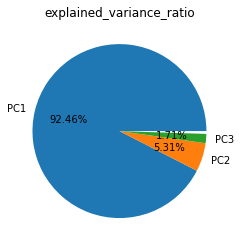

In [5]:
ratio = pca.explained_variance_ratio_

df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3'], columns=['V_ration'])
plt.pie(df_v['V_ration'], labels=df_v.index, autopct = "%.2f%%")
plt.title("explained_variance_ratio")
plt.show()

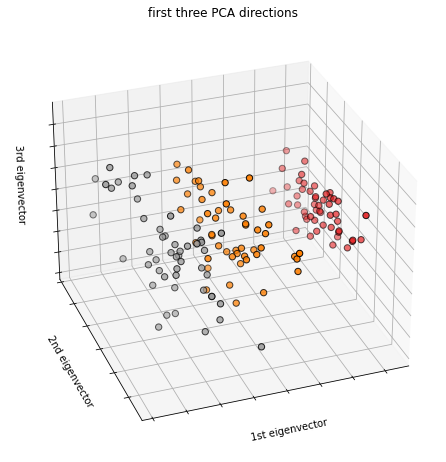

In [6]:
fig = plt.figure(1, figsize=(8,6))
ax= Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
X_reduced[:,0],
X_reduced[:,1],
X_reduced[:,2],
c=y,
cmap=plt.cm.Set1,
edgecolor='k',
s=40)

ax.set_title('first three PCA directions')
ax.set_xlabel('1st eigenvector')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd eigenvector')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3rd eigenvector')
ax.w_zaxis.set_ticklabels([])
plt.show()

In [7]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1, fit_inverse_transform=True)

X_reduced_lin = lin_pca.fit_transform(X)
X_reduced_rbf = rbf_pca.fit_transform(X)
X_reduced_sig = sig_pca.fit_transform(X)

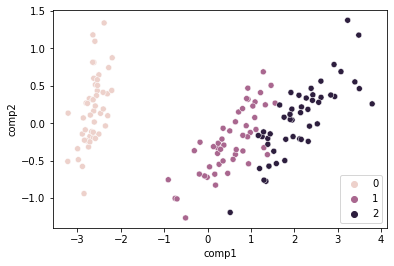

In [8]:
import seaborn as sns

sns.scatterplot(x=X_reduced_lin[:,0], y=X_reduced_lin[:,1], hue=y)
plt.xlabel("comp1")
plt.ylabel('comp2')
plt.show()

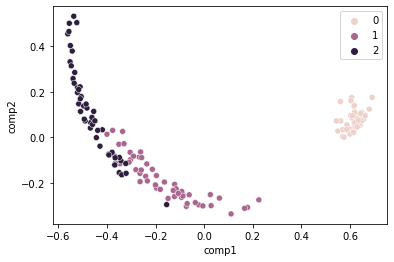

In [9]:
sns.scatterplot(x=X_reduced_rbf[:,0], y=X_reduced_rbf[:,1], hue=y)
plt.xlabel("comp1")
plt.ylabel('comp2')
plt.show()

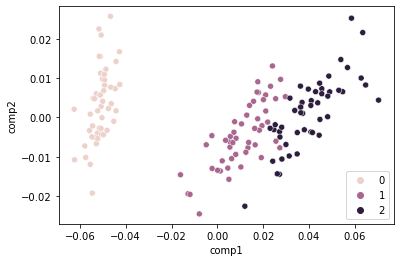

In [10]:
sns.scatterplot(x=X_reduced_sig[:,0], y=X_reduced_sig[:,1], hue=y)
plt.xlabel("comp1")
plt.ylabel('comp2')
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression(solver='lbfgs'))
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05,10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [13]:
rbf_pca =  KernelPCA(n_components=2, kernel='rbf', gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_preimage)

1.2922825580816432e-29

In [14]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

2

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_reduced_lda = lda.transform(X)

In [16]:
from scipy import stats

In [18]:
N = 100
rv1 = stats.multivariate_normal([0,0], [[0.7,0.0],[0.0, 0.7]])
rv2 = stats.multivariate_normal([1,1], [[0.8,0.2],[0.2, 0.8]])
rv3 = stats.multivariate_normal([-1,1], [[0.8,0.0],[0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1,X2,X3])
y = np.hstack([y1,y2,y3])

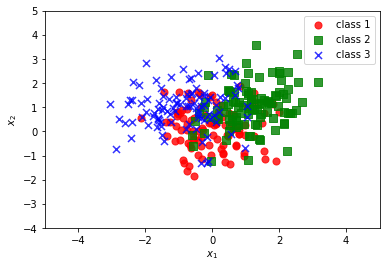

In [20]:
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, marker='o', color='r', label='class 1')
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, marker='s', color='g', label='class 2')
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, marker='x', color='b', label='class 3')
plt.xlim(-5,5)
plt.ylim(-4,5)
plt.xlabel("$x_1$")
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X,y)

In [22]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [23]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.62453502e-01,  1.00580859e+00]])

In [24]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [25]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [26]:
qda.covariance_[2]

array([[0.9569443 , 0.11129731],
       [0.11129731, 0.7795369 ]])

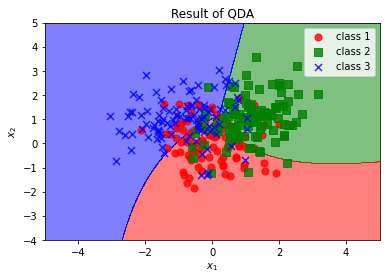

In [27]:
import matplotlib as mpl
import seaborn as sns

x1min, x1max = -5,5
x2min, x2max = -4,5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                      np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)

cmap = mpl.colors.ListedColormap(sns.color_palette(["r","g","b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, marker='o', color='r', label='class 1')
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, marker='s', color='g', label='class 2')
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, marker='x', color='b', label='class 3')
plt.xlim(x1min,x1max)
plt.ylim(x2min,x2max)
plt.xlabel("$x_1$")
plt.ylabel('$x_2$')
plt.title('Result of QDA')
plt.legend()
plt.show()

In [28]:
!pip install pydataset

  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939431 sha256=c0a452c40b1f31acacafa29d1e914b9257412d976d95810c4c401ec954a87c26
  Stored in directory: c:\users\whssk\appdata\local\pip\cache\wheels\d7\e5\36\85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset


In [29]:
import pandas as pd
from pydataset import data
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns

initiated datasets repo at: C:\Users\whssk\.pydataset/


In [31]:
df = data('Wages1')
df.head()

,exper,sex,school,wage
1,9,female,13,6.315296
2,12,female,12,5.479770
3,11,female,11,3.642170
4,9,female,14,4.593337
5,8,female,14,2.418157


C:\Users\whssk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\whssk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\whssk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='wage', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

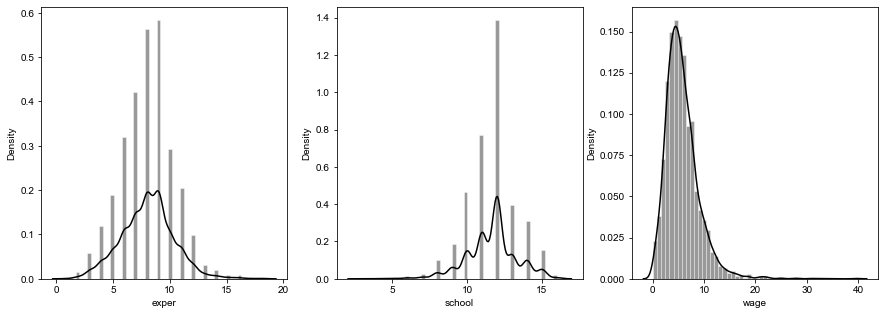

In [32]:
fig = plt.figure()
fig, axs = plt.subplots(figsize=(15,5), ncols=3)
sns.set(font_scale=1.4)
sns.distplot(df['exper'],color='black', ax=axs[0])
sns.distplot(df['school'], color='black', ax=axs[1])
sns.distplot(df['wage'],color='black', ax=axs[2])

In [33]:
sex = pd.get_dummies(df['sex'])
df.drop(['sex'], axis=1, inplace=True)
df = pd.concat([df,sex], axis=1)
df.head()

,exper,school,wage,female,male
1,9,13,6.315296,1,0
2,12,12,5.479770,1,0
3,11,11,3.642170,1,0
4,9,14,4.593337,1,0
5,8,14,2.418157,1,0


<AxesSubplot:>

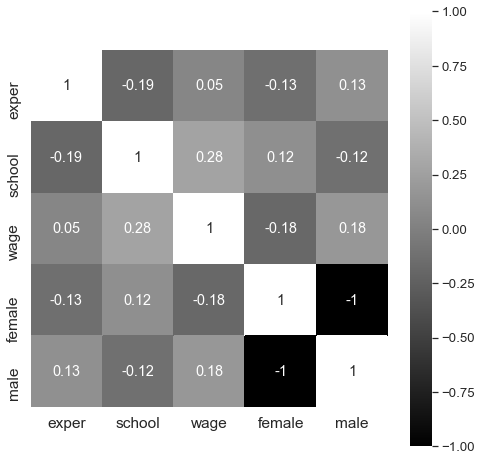

In [35]:
corrmat = df.corr(method='pearson')
f, ax=plt.subplots(figsize=(8,8))
sns.set(font_scale=1.2)
sns.heatmap(round(corrmat,2),
           vmax=1., square=True,
           cmap='gist_gray', annot=True)

In [36]:
X=df[['exper','school','wage']]
y=df['male']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=50)

In [37]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

Text(0.5, 19.5, 'Predict')

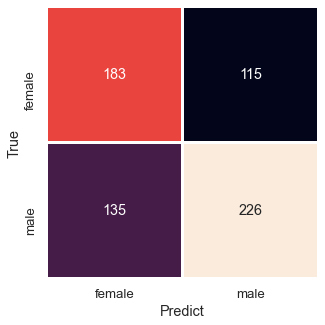

In [38]:
cm = confusion_matrix(y_test, y_pred_lda)
ax = plt.subplots(figsize=(5,5))
with sns.axes_style('white'):
    sns.heatmap(cm, cbar=False, square=True, annot=True, fmt='g', linewidths=2.5,
               xticklabels={'female','male'}, yticklabels={'female','male'})
plt.ylabel('True'); plt.xlabel('Predict')

In [39]:
round(accuracy_score(y_test, y_pred_lda),4)

0.6206

In [40]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       298
           1       0.66      0.63      0.64       361

    accuracy                           0.62       659
   macro avg       0.62      0.62      0.62       659
weighted avg       0.62      0.62      0.62       659



In [41]:
qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

Text(0.5, 19.5, 'Predict')

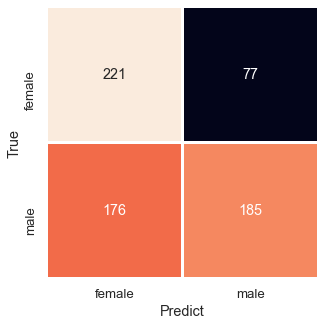

In [42]:
cm = confusion_matrix(y_test, y_pred_qda)
ax = plt.subplots(figsize=(5,5))
with sns.axes_style('white'):
    sns.heatmap(cm, cbar=False, square=True, annot=True, fmt='g',linewidths=2.5,
               xticklabels={'female','male'}, yticklabels={'female','male'})
plt.ylabel('True'); plt.xlabel('Predict')

In [43]:
round(accuracy_score(y_test, y_pred_qda),4)

0.6161

In [44]:
print(classification_report(y_test, y_pred_qda))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64       298
           1       0.71      0.51      0.59       361

    accuracy                           0.62       659
   macro avg       0.63      0.63      0.61       659
weighted avg       0.64      0.62      0.61       659



Text(0.5, 0, 'False Positive Rate')

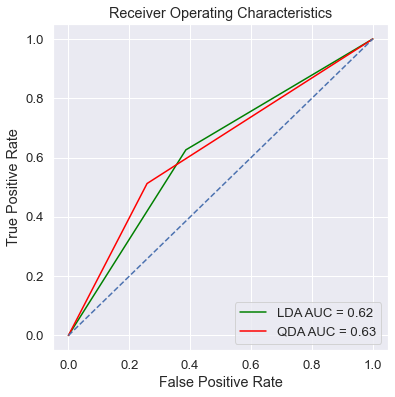

In [45]:
false_positive_rate_qda, true_positive_rate_qda, thresholds = roc_curve(y_test, y_pred_qda)
roc_auc_qda = auc(false_positive_rate_qda, true_positive_rate_qda)
false_positive_rate_lda, true_positive_rate_lda, thresholds = roc_curve(y_test, y_pred_lda)
roc_auc_lda = auc(false_positive_rate_lda, true_positive_rate_lda)

plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristics')
plt.plot(false_positive_rate_lda, true_positive_rate_lda,
        color='green', label='LDA AUC = {:.2f}'.format(roc_auc_lda))
plt.plot(false_positive_rate_qda, true_positive_rate_qda,
        color='red', label='QDA AUC = {:.2f}'.format(roc_auc_qda))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')